<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/Ass_Decision_Tree_FraudCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraud.rename(columns={'Marital.Status':'status','Taxable.Income':'income','City.Population':'population','Work.Experience':'experience'},inplace=True)
fraud

,Undergrad,status,income,population,experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fraud[fraud.duplicated()]

,Undergrad,status,income,population,experience,Urban


There are no any dulpicates found

In [7]:
fraud.income.min()

10003

In [8]:
fraud.income.max()

99619

In [9]:
#Create new column 'TaxInc' for converting the taxable income variables to bucketing.
fraud["TaxInc"] = pd.cut(fraud["income"], bins=[10002,30000,99620], labels=["Risky","Good"])
fraud

,Undergrad,status,income,population,experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
#Create dummy variables
fraud1 = pd.get_dummies(fraud, columns=['Undergrad','status','Urban','TaxInc'],drop_first=True)
fraud1

,income,population,experience,Undergrad_YES,status_Married,status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [11]:
# Normalization factor
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
# Normalized DataFrame ( Considering numerical part of the data)
fraud_norm = norm_func(fraud1)
fraud_norm

,income,population,experience,Undergrad_YES,status_Married,status_Single,Urban_YES,TaxInc_Good
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [13]:
# Declaring Feature and Target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
Y = fraud_norm['TaxInc_Good']

In [14]:
X

,income,population,experience,Undergrad_YES,status_Married,status_Single,Urban_YES
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0


In [15]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [16]:
fraud_norm['TaxInc_Good'].unique()

array([1., 0.])

In [17]:
fraud_norm.TaxInc_Good.value_counts()

1.0    476
0.0    124
Name: TaxInc_Good, dtype: int64

In [18]:
colnames = list(fraud_norm.columns)
colnames

['income',
 'population',
 'experience',
 'Undergrad_YES',
 'status_Married',
 'status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [19]:
# Splitting data into Training and Testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier using Entropy criteria

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

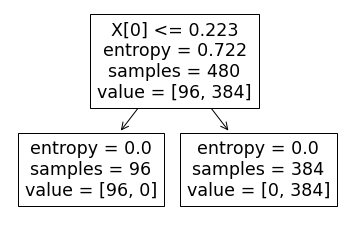

In [21]:
# Plot the Decision Tree
tree.plot_tree(model);

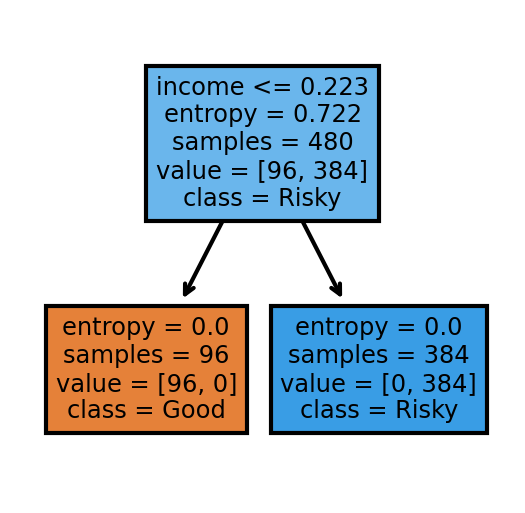

In [22]:
fn = ['income','population','experience','Undergrad_YES','status_Married','status_Single','Urban_YES']
cn = ['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
# Predicting on Test data
preds = model.predict(X_test)  # Predicting on test data set
pd.Series(preds).value_counts()  # Getting the count of each category

1.0    92
0.0    28
dtype: int64

In [24]:
preds

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1.])

In [25]:
# Getting the 2-way table to understand correct and wrong predictions
pd.crosstab(Y_test,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,28,0
1.0,0,92


In [26]:
# Accuracy
np.mean(preds==Y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria 

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 7)

In [28]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
# Prediction and computing the accuracy
pred = model_gini.predict(X_test)
np.mean(pred==Y_test)

1.0

# Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
array = fraud_norm.values
x = array[:,0:6]
y = array[:,6]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [33]:
model2 = DecisionTreeRegressor()

In [34]:
model2.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
# Find the accuracy
model.score(X_test, Y_test)

1.0